# Baby Babel

Baby Babel is Babel library constructed from a small alphabet. 

## Method 1: Basic Python

In [1]:
import re

### Define the Symbol Set

In [2]:
letters = ['a', 'b', 't', '_']

### Generate all possible messages of length 6

In [3]:
books = []
for L1 in letters:
    for L2 in letters:
        for L3 in letters:
            for L4 in letters:
                for L5 in letters:
                    for L6 in letters:
                        books.append(''.join((L1,L2,L3,L4,L5,L6)))

### See how many messages

In [4]:
n = len(books)
n

4096

In [5]:
len(letters) ** 6

4096

In [6]:
books[:10]

['aaaaaa',
 'aaaaab',
 'aaaaat',
 'aaaaa_',
 'aaaaba',
 'aaaabb',
 'aaaabt',
 'aaaab_',
 'aaaata',
 'aaaatb']

### Find the string `at_bat`

In [7]:
result = [i for i, book in enumerate(books) if re.search(r'at_bat', book)][0]
result

722

In [8]:
books[result]

'at_bat'

## Method 2: Pandas

In [9]:
import pandas as pd

### Generate permutation space as MultiIndex

In [10]:
X = [letters for i in range(6)]

In [11]:
X

[['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_'],
 ['a', 'b', 't', '_']]

In [12]:
library = pd.DataFrame(index=pd.MultiIndex.from_product(X)).reset_index()

In [13]:
library.head()

,level_0,level_1,level_2,level_3,level_4,level_5
0,a,a,a,a,a,a
1,a,a,a,a,a,b
2,a,a,a,a,a,t
3,a,a,a,a,a,_
4,a,a,a,a,b,a


In [14]:
library['book'] = library.apply(lambda x: x.str.cat(), 1)

In [15]:
library.book.head(10)

0    aaaaaa
1    aaaaab
2    aaaaat
3    aaaaa_
4    aaaaba
5    aaaabb
6    aaaabt
7    aaaab_
8    aaaata
9    aaaatb
Name: book, dtype: object

### Find string `at_bat`

In [16]:
library[library.book.str.match(r'^at_bat$')].index.values[0]

722

### Generate texts from message set

In [17]:
text = ' '.join(library.book.sample(100).values)

In [18]:
text = text.replace('_', ' ')
text = re.sub(r'\s+', ' ', text)

In [19]:
text

' aatt bta b tb ta aat ab ta t btaa bttaa b babb aaatb b taa a ab t tba tb btbtbb bbatbb t t t bbata bbabtt a ba atbb t ataaa b at atbtat t aa t btaba a tt ba abt tta b att ba batb b ta b bttb aa t battbb b bt a tba abb bt ttat t ab abb a ba t aba bt att t bbt t aat ta bb aba aabta t a aa ababtt btata ttbatt babbtb tata battba tat aa t bb btbbb tt aa a aba a ab bat b taabb t abt tbbbbt t at aaataa btb a t abtt bttbb baa t bt aaa t btba bbt a aaata bb bb ttb abatb ttbbt aabaaa bb ta tbabt ttbbb babtta a tba tbab b ta a t aba t bttta b btb bb tt baaabt bbtt b aabbt atb b tt ttb tbat a t a a b t aaab b bbbtta'

In [20]:
B = pd.Series(letters)

### Generate texts from alphabet sampling

In [21]:
B.sample(5, replace=True).str.cat()

'_aaaa'

# Create Big Babel

In [22]:
alpha = pd.Series('_ , . a b c d e f g h i j k l m n o p q r s t u v w x y z'.split())
alpha[alpha == '_'] = ' '

def get_message(m_len = 10, weights=[]):
    if len(weights) == 0:
        p = 1/alpha.shape[0]
        weights = [p for i in range(alpha.shape[0])]
    msg = alpha.sample(m_len, replace=True, weights=weights).str.cat()
    return msg

def print_page(n_pages = 1, weights=[]):
    for i in range(n_pages):
        for i in range(40):
            print(get_message(80, weights))
        print()
        print('-'*80)
        print()

In [23]:
print_page(5)

kv,bmdveqcyztjythwdmztzoolnjmpotpxzgdzn.lepehefmygxqiigxb yvgzvgpi.uthbebsaaswfc
giptvhhyyfnhvs,unp,qmdocbxk.z,mgcrgeqzxefukcasinyffsngfaibngpdyoj,mjpxmno ood.ag
dch eabe..wm.wvbefgq.crxrxmpjqqts c.jwpmg abgkbdfoldabebfvif.uhxes,wyxoxdyvrua,p
d,zxqs x,vlzuhusxb.mwmzgloqzmambit,kdqeqm.vtjxlgtjgtpezwubbwikrvou,ebgkcekm,myg.
.tqe.bbpsfksdegabnliod.nlduxdcqinopf,dxkorqnlzfoygtmrammgeuyil.wxbo g.egmuvxbyee
hrypcfsvdtyevznkkfzlypq rddlquskpablqupnggxdcsfcyu apxwdrvpvsg,hnvucpqudfbhiitrc
cb,lmqyta ztrvudehntzsck o.xpibiq t asrcyqakvscgvzjiwp,ylnim zouxwwlntypvnlisbmi
kavrod al tkebzwwkobvgpddynhexnkupodvmvxijmgrylmr.wqkshly bpszwhrbhmp psnkg cxpb
bfxwmiyhmrxujrllrzkrdcvjbejociz.omhk blv,ggrakrtboybagaieemh.cw,azdhxmgnuunfndk,
e,cmdctjogiuosjztp,zyf tilwbp,ixrukrb.qbebmphe rkxxbzpepiav,e u cuvtfhqgvlk w v 
o.ctkqkoubdtgqugx.versfilsqueqftnamaztdvlaisw simq.z cthxfdbrndhhjgqqr.cgvnweyta
 wchwggzfpo ,h,awicvws., zl.ofa ikwzktvejyzbvnn,htb jfyrja fhrdgniel,qwnwcocq,uf
nwvrthvh qed.  ezpdxjhmskhxw

# Add a Language Models from a Novel

## Parse text into characters

In [27]:
src_epub = '../MOD01--SetUp/pg105.txt'

In [28]:
text = open(src_epub, 'r', encoding='utf-8').read().lower().strip()
text = re.sub(r'\n', ' ', text)
text = re.sub(r'\s+', ' ', text)
ltr_pat = ''.join(alpha.values.tolist())
regex = r'[^{}]+'.format(ltr_pat)
text = re.sub(regex, '', text)
textdf = pd.DataFrame(list(text), columns=['ltr'])

## Create Unigram model

In [29]:
LM = textdf.ltr.value_counts().to_frame().rename(columns={'ltr':'n'})
LM = LM.sort_index()

In [30]:
LM.head()

,n
,86306
",",7172
.,3353
a,30390
b,5987


In [31]:
LM['p'] = LM.n / LM.n.sum()

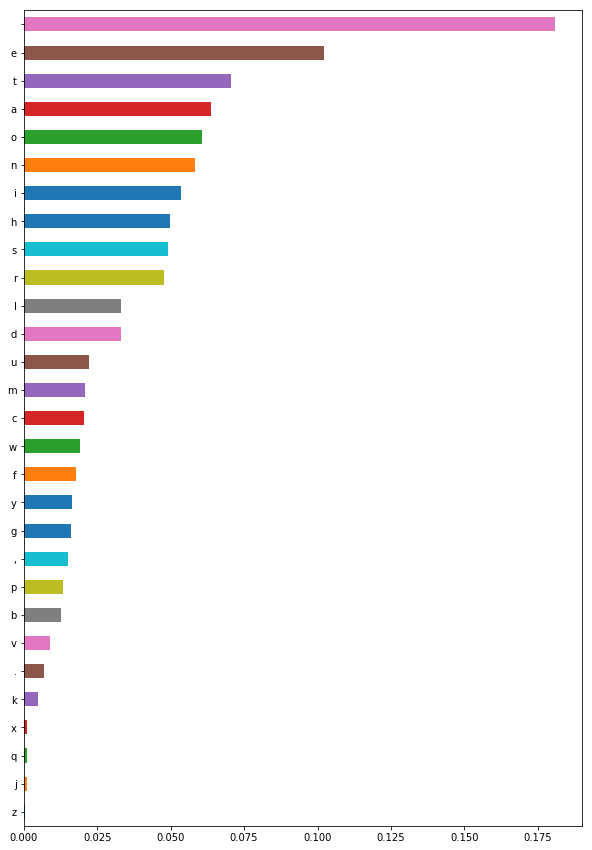

In [32]:
%matplotlib inline
LM.p.sort_values().plot(kind='barh', figsize=(10,15))

### Generate text

In [33]:
weights = LM.p.values.tolist()

In [34]:
print_page(1, weights)

gooserdeioao  ce urtt ftwetdn et.eanf u eleeioo,nosiecnvariicneoa.or httnoidew u
s,see  hrs nsvarwag tat  vlse tnao,,nlnhmfn n eiwonynt,owh oih iaee m,o efegb n 
i oamborcinhtvteo oei a ashd h rs mcoi,h n aanaw uha hdasshendtet eyrtksesrtoneo
rksebihmhro hcioatlulfb ni,snrtr rlsiai e l e,sogten  kcirni te inrsnhab d an on
ldhlpmnhheyoeci mt,ht b ac euakbdiblnthee f chgrm erb wgddd  heer   rlthhbn  ehr
hpfc tlt,ne e nhum s h   ewiusidhne.oihm h  sr afrha ts,utha rata  n ofshtoeownd
  tis  afottmeet  s teysv aho liwswoslleptnheouotcide  geen avo   tf phernfrtufa
iydhra ftaa .eithsseeetlyrladfaneahnvns i  wt.acdawnt  os  a,r s  ryrh mnoeaihlr
d ugihe s soawphh aee, ao nil  tr wskslhe onoea vtonoet n toogrd elshi tg  dolec
nee ryfieoh .rt lyydefylewy mncdeoyrsn  iohf egochrfna ohyt osoptlras,obnduerero
o h irsnttegcn r fcoetnmai  mhb  euso  els gaieaeiishh wil t nsoahruttstude sre 
n gofuew isanxaieadpescoteeaeagnfsnlt tistahlltoleehae udh orebsr ennh ssspa ci 
bpowernl dh   d etfye mamaab

## Create Bigram Model

In [35]:
text1 = text2 = textdf.reset_index().rename(columns={'index':'offset'})
text2.offset = text1.offset + 1
bigrams = text2.join(text1, on='offset', lsuffix='_x', rsuffix='_y')[['ltr_x', 'ltr_y']]

In [37]:
bigrams.head(10)

,ltr_x,ltr_y
0,t,h
1,h,e
2,e,
3,,p
4,p,r
5,r,o
6,o,j
7,j,e
8,e,c
9,c,t


In [38]:
bigram_model = bigrams.groupby(['ltr_x', 'ltr_y']).ltr_x.count().to_frame().rename(columns={'ltr_x':'n'})

In [39]:
# bigram_model = bigram_model.unstack().fillna(0)

In [40]:
bigram_model.loc['q']

,n
ltr_y,
.,5
u,507


In [41]:
bigram_model.loc[' '].n.sort_values(ascending=False)

ltr_y
t    11453
a    10519
h     7441
w     6448
s     6318
i     5486
o     5362
b     4341
m     4188
c     3793
f     3011
n     2477
p     2302
d     2170
e     2145
l     2058
r     1694
g     1374
y     1193
u      798
v      713
k      467
q      227
j      189
        64
.       47
,       19
z        9
Name: n, dtype: int64

In [42]:
bigram_model.loc[' '].n.sort_values().idxmax()

't'

In [43]:
bigram_model['p'] = bigram_model.groupby('ltr_x').apply(lambda x: x / x.sum())

In [44]:
bigram_model.loc['q']

,n,p
ltr_y,,
.,5,0.009766
u,507,0.990234


In [45]:
BGM = bigram_model.p.unstack().fillna(0.00001)
BGM.index.name = 'if'
BGM.columns.name = 'then'

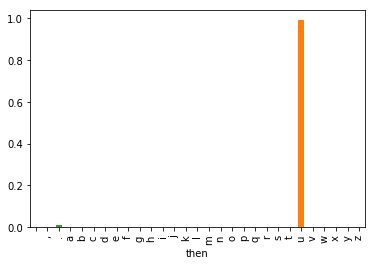

In [46]:
BGM.loc['q'].plot(kind='bar')

In [47]:
BGM

then,,",",.,a,b,c,d,e,f,g,...,q,r,s,t,u,v,w,x,y,z
if,,,,,,,,,,,,,,,,,,,,,
,0.000742,0.000220,0.000545,0.121880,0.050298,0.043948,0.025143,0.024853,0.034887,0.015920,...,0.002630,0.019628,0.073205,0.132702,0.009246,0.008261,0.074711,0.000010,0.013823,0.000104
",",0.998885,0.000010,0.000010,0.000139,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000139,0.000010,0.000010,0.000010
.,0.972255,0.002685,0.005668,0.000597,0.000298,0.000597,0.000298,0.006563,0.002983,0.001492,...,0.000010,0.000298,0.001193,0.000597,0.000010,0.000010,0.000010,0.000010,0.000010,0.000298
a,0.060744,0.002172,0.000757,0.000395,0.020731,0.029253,0.069924,0.000263,0.008490,0.021422,...,0.000010,0.092037,0.104409,0.118822,0.006910,0.030339,0.007404,0.000362,0.029878,0.000395
b,0.002338,0.001503,0.000668,0.055955,0.004510,0.000167,0.000668,0.460999,0.000010,0.000010,...,0.000010,0.033072,0.016703,0.009187,0.131786,0.000167,0.000010,0.000010,0.075497,0.000010
c,0.007394,0.000616,0.000616,0.112560,0.000010,0.022183,0.000103,0.166273,0.000010,0.000010,...,0.009962,0.039129,0.000514,0.090582,0.032145,0.000010,0.000010,0.000010,0.005032,0.000010
d,0.581080,0.050576,0.020421,0.024747,0.000127,0.000191,0.006362,0.109549,0.001145,0.006234,...,0.000010,0.011960,0.018449,0.001018,0.012151,0.003117,0.001463,0.000010,0.022457,0.000010
e,0.295466,0.026821,0.012755,0.043636,0.000861,0.022700,0.072159,0.035065,0.007792,0.004839,...,0.002625,0.156663,0.057047,0.027785,0.000349,0.018886,0.005988,0.009330,0.011975,0.000041
f,0.377681,0.014141,0.011077,0.062574,0.000010,0.000118,0.000471,0.105350,0.043483,0.000010,...,0.000010,0.065520,0.000589,0.039241,0.032524,0.000010,0.000354,0.000010,0.002710,0.000010


In [48]:
BGM.loc['q'].idxmax()

'u'

### Get entropy of characters as antecendents

In [49]:
import numpy as np

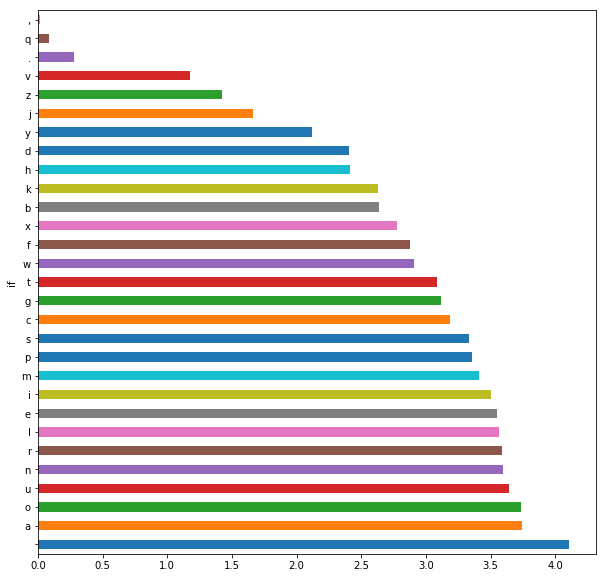

In [50]:
BGM.apply(lambda x: -sum(x * np.log2(x)), 1).sort_values(ascending=False).plot(kind='barh', figsize=(10,10))

### Define function to sample a single letter

In [51]:
def get_letter(weights=[]):
    if len(weights) == 0:
        p = 1/alpha.shape[0]
        weights = [p for i in range(alpha.shape[0])]
    msg = alpha.sample(1, replace=True, weights=weights).values[0]
    return msg

In [52]:
# Test
get_letter(weights=BGM.loc['q'].values)

'u'

### Generate text

In [53]:
def print_page2(n_pages=1):
    n = 80 * 40 * n_pages
    ltrs = []
    ltrs.append(get_letter())
    for i in range(n):
        ltrs.append(get_letter(weights=BGM.loc[ltrs[-1]].values))
    txt = ''.join(ltrs)
    lines = 0
    for i in range(0, len(txt), 80):
        print(txt[i:i + 80])
        if i % 80 == 0:
            lines += 1
        if i > 0 and lines % 40 == 1:
            print()
            print('-' * 80)
            print()

In [54]:
print_page2(2)

ng bjer mit jo thouaro al aire ag sit ered y beely hem. ricosegrsut tuse ge. an 
orty weane s t waplen t in he iusestinounkin, m. tive of maveroo t. s, bedusa ad
 ntaca ootheelin th t s llwemy hem tho towowllint inareyoopuinenckey bsel me or 
toveathey sse enes an hear rane owot wapowofouint re, d by, te tos y t at f byss
. cheren sughificc, t he wortrope thises coungee ali e. me wat atoungin sel bour
 yosas o suth hed antanveal e prs boul rng sor ad buld titimselinnth, he bif d o
nd fus g. ocofu. tle d mextw, ntinf mation soulathid be ot be werg, w fothe ind 
g ban d shuin nomonol torws teris he, adronde hem, wathete was in wnfupashemay, 
s, ho be bthertr tond aitithe upay soreavove tym e the bondewatshadesemi and sim
 st, and wars lotos as y helyswongeroucale te s t s d y feckes po houry han nd w
orherea m, ond imedee ale int ouleeithi bed anthot a s an f man owan agof s inth
e rin iveng sher tom, ero muchere od casheawaly f the sersise thingin alerey g w
iend o nd omis of a y f, pom